# IBM Machine Learning
## Specialized Models: Time Series and Survival Analysis
### Final Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter 
import warnings
import os
# os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)

%matplotlib inline

### Exploratory Data Analysis

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
df.sample(7)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8239,639,Spain,Male,34,7,149940.04,2,0,0,156648.81,0
124,625,France,Female,28,3,0.00,1,0,0,183646.41,0
6199,449,Spain,Female,33,8,0.00,2,0,0,156792.89,0
7207,520,Spain,Female,30,4,145222.99,2,0,0,145160.96,0
456,733,France,Male,33,3,0.00,1,1,1,7666.73,0
4589,615,France,Male,35,7,0.00,2,1,0,150784.29,0
6231,631,Germany,Male,48,1,106396.48,1,1,1,150661.42,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [4]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

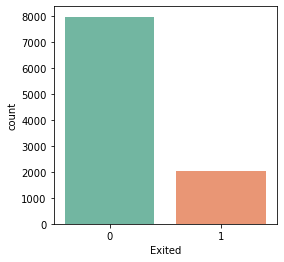

In [5]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, 
              x='Exited', 
              palette="Set2")

### Kaplan-Meier Curve

Text(0, 0.5, 'Survival probability')

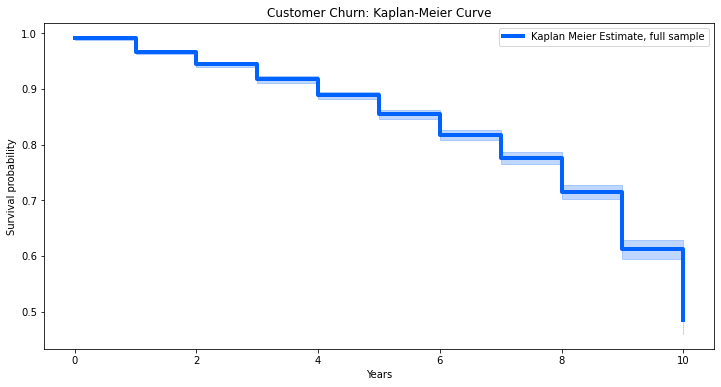

In [6]:
kmf = KaplanMeierFitter()

kmf.fit(df.Tenure, df.Exited, label = 'Kaplan Meier Estimate, full sample')

kmf.plot(linewidth=4, figsize=(12, 6))
plt.title('Customer Churn: Kaplan-Meier Curve')
plt.xlabel('Years')
plt.ylabel('Survival probability')

### Examining Variables

Exited
0    AxesSubplot(0.547727,0.125;0.352273x0.343182)
1    AxesSubplot(0.547727,0.125;0.352273x0.343182)
Name: Tenure, dtype: object

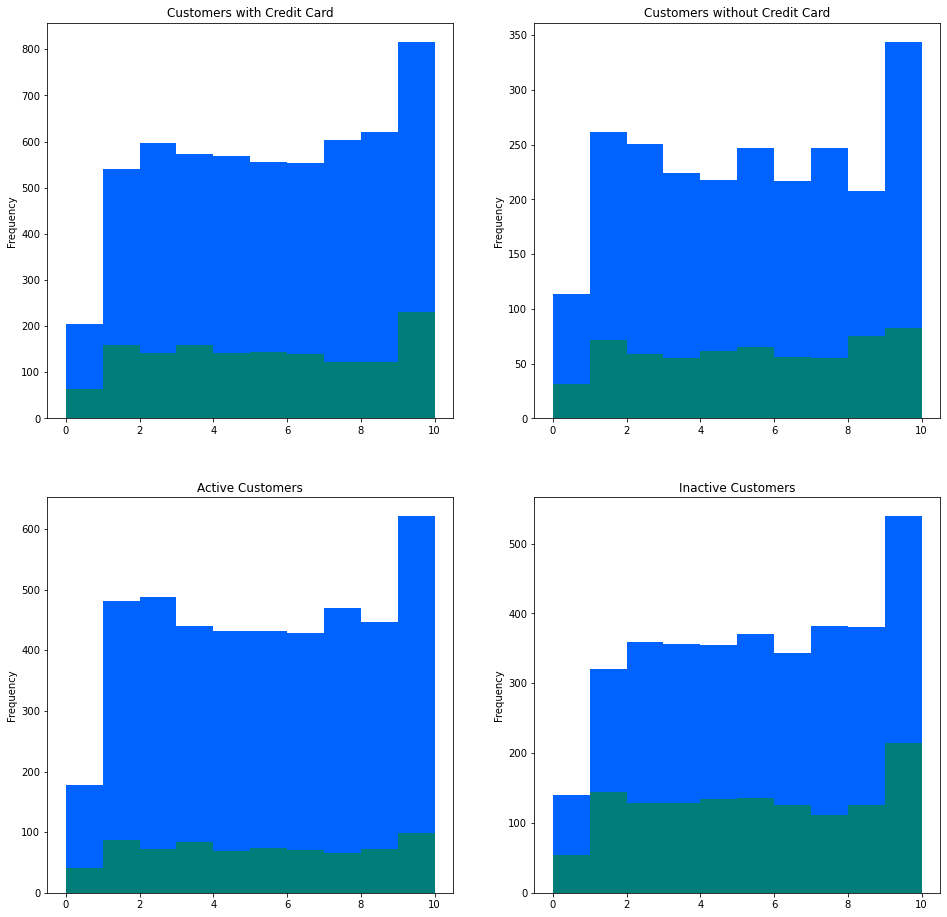

In [7]:
df1 = df[df.HasCrCard==1]
df2 = df[df.HasCrCard==0]
df3 = df[df.IsActiveMember==1]
df4 = df[df.IsActiveMember==0]

fig, ax = plt.subplots(2,2, figsize=(16,16))
df1.groupby('Exited')['Tenure'].plot(kind='hist', ax=ax[0,0], title='Customers with Credit Card')
df2.groupby('Exited')['Tenure'].plot(kind='hist', ax=ax[0,1], title='Customers without Credit Card')
df3.groupby('Exited')['Tenure'].plot(kind='hist', ax=ax[1,0], title='Active Customers')
df4.groupby('Exited')['Tenure'].plot(kind='hist', ax=ax[1,1], title='Inactive Customers')

Text(0, 0.5, 'Survival probability')

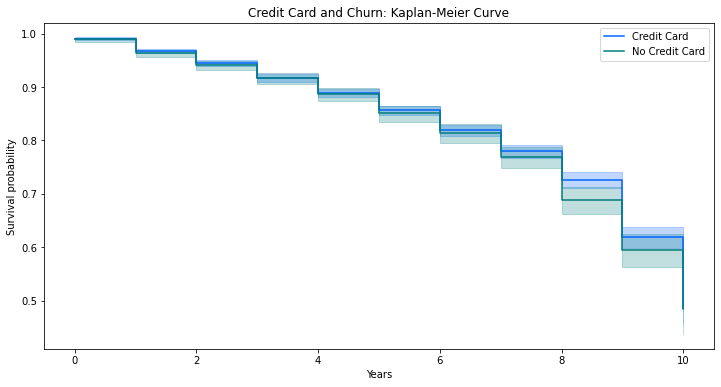

In [8]:
kmf.fit(df1.Tenure, df1.Exited)
kmf.plot(label='Credit Card', figsize=(12, 6))
kmf.fit(df2.Tenure, df2.Exited)
kmf.plot(label='No Credit Card')
plt.title('Credit Card and Churn: Kaplan-Meier Curve')
plt.xlabel('Years')
plt.ylabel('Survival probability')

### Cox Proportional Hazards Model

In [9]:
dfu = df[['HasCrCard', 'Exited']]
dfd = pd.get_dummies(dfu, drop_first=True)
dfd['Tenure'] = df.Tenure
dfd.rename(columns={'multiple_Yes':'Multiple Services'}, inplace=True)

In [10]:
dfd

,HasCrCard,Exited,Tenure
0,1,1,2
1,0,0,1
2,1,1,8
3,0,0,1
4,1,0,2
...,...,...,...
9995,1,0,5
9996,1,0,10
9997,0,1,7
9998,1,1,3


In [11]:
cph = CoxPHFitter()
cph.fit(dfd, duration_col='Tenure', event_col='Exited')
cph.print_summary(style='ascii')

<lifelines.CoxPHFitter: fitted with 10000 total observations, 7963 right-censored observations>
             duration col = 'Tenure'
                event col = 'Exited'
      baseline estimation = breslow
   number of observations = 10000
number of events observed = 2037
   partial log-likelihood = -17059.26
         time fit was run = 2021-06-17 02:31:09 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
HasCrCard  -0.06       0.94       0.05            -0.16             0.03                 0.85                 1.03

              z    p   -log2(p)
covariate                      
HasCrCard -1.32 0.19       2.41
---
Concordance = 0.51
Partial AIC = 34120.51
log-likelihood ratio test = 1.72 on 1 df
-log2(p) of ll-ratio test = 2.39



<AxesSubplot:xlabel='log(HR) (95% CI)'>

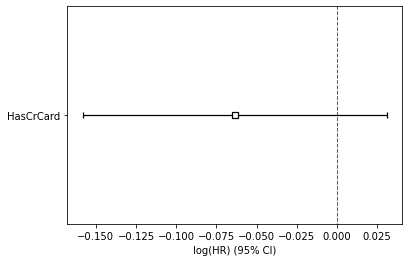

In [12]:
cph.plot()

<AxesSubplot:>

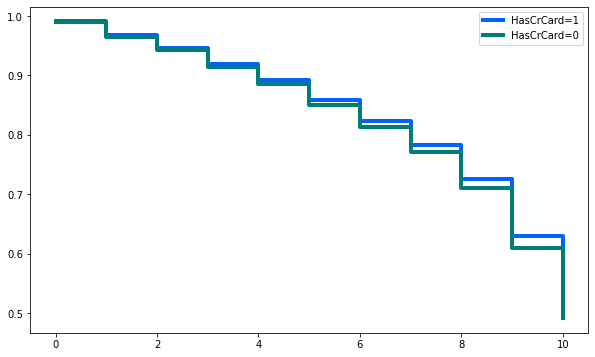

In [13]:
cph.plot_partial_effects_on_outcome('HasCrCard', [1, 0], plot_baseline=False, figsize=(10, 6), lw=4)

In [14]:
# Including additional variables, data setup
dfu = df[['Exited', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]
dfd = pd.get_dummies(dfu, drop_first=True)
dfd['Tenure'] = df.Tenure

In [15]:
# Fitting Cox Proportional Model
cph = CoxPHFitter()
cph.fit(dfd, duration_col='Tenure', event_col='Exited')
cph.print_summary(style='ascii')

<lifelines.CoxPHFitter: fitted with 10000 total observations, 7963 right-censored observations>
             duration col = 'Tenure'
                event col = 'Exited'
      baseline estimation = breslow
   number of observations = 10000
number of events observed = 2037
   partial log-likelihood = -16957.10
         time fit was run = 2021-06-17 02:31:10 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
NumOfProducts   -0.19       0.83       0.04            -0.26            -0.11                 0.77                 0.90
HasCrCard       -0.07       0.94       0.05            -0.16             0.03                 0.85                 1.03
IsActiveMember  -0.61       0.55       0.05            -0.70            -0.52                 0.50                 0.60

                    z      p   

<AxesSubplot:xlabel='log(HR) (95% CI)'>

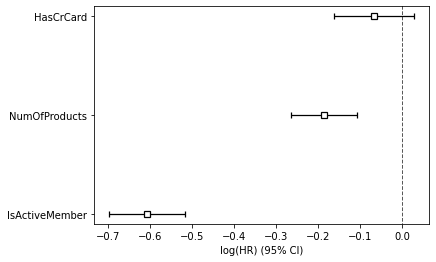

In [16]:
cph.plot()

<AxesSubplot:>

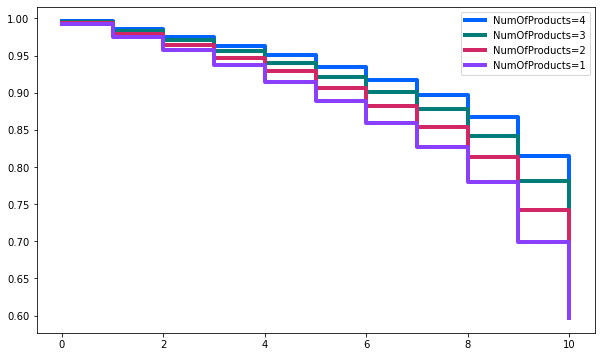

In [17]:
cph.plot_partial_effects_on_outcome('NumOfProducts', [4,3,2,1], 
                                    plot_baseline=False, 
                                    figsize=(10, 6), 
                                    lw=4) 

<AxesSubplot:>

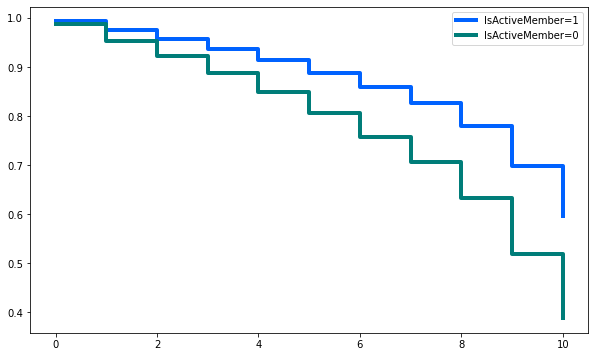

In [18]:
cph.plot_partial_effects_on_outcome('IsActiveMember', [1, 0], 
                                    plot_baseline=False, 
                                    figsize=(10, 6), 
                                    lw=4) 